In [34]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# read data
df = pd.read_csv('https://raw.githubusercontent.com/mzakibhr/SKLearn-SVR-SalaryData/main/Salary_Data.csv')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [36]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [37]:
# memisahkan data dan label
x = df['YearsExperience']
y = df['Salary']

# mengubah bentuk atribut
x = x[:,np.newaxis]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


In [38]:
# membangun model dengan parameter C, gamma, dan kernel
model = SVR(C=1000, gamma=0.05, kernel='rbf')

# melatih model dengan fungsi fit
model.fit(x,y)

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.05,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

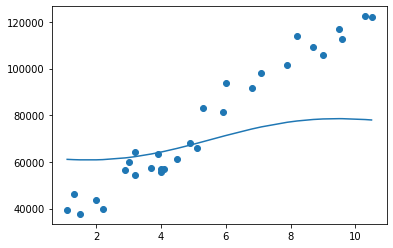

In [39]:
# Visualisasi model
plt.scatter(x,y)
plt.plot(x, model.predict(x))

USE GRID SEARCH TO GET BEST DATA PATTERN





In [41]:
# membangun model dengan parameter C, gamma dan kernel
model = SVR()
parameters = {
    'kernel': ['rbf'],
    'C':      [1000, 10000,100000],
    'gamma':  [0.5, 0.05, 0.005]
}
grid_search = GridSearchCV(model, parameters)

# melatih model dengan fungsi fit
grid_search.fit(x,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1000, 10000, 100000],
                         'gamma': [0.5, 0.05, 0.005], 'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [42]:
# menampilkan parameter terbaik dari objek grid_search
print(grid_search.best_params_)

{'C': 100000, 'gamma': 0.005, 'kernel': 'rbf'}


In [43]:
# membuat model SVM baru dengan parameter terbaik hasil grid search
new_model = SVR(C=100000, gamma=0.05, kernel='rbf')
new_model.fit(x,y)

SVR(C=100000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.05,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

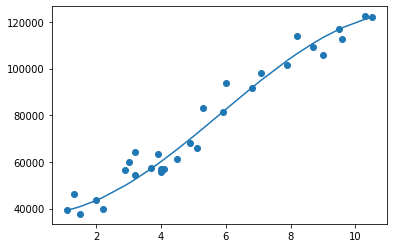

In [44]:
plt.scatter(x,y)
plt.plot(x, new_model.predict(x))